In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

In [0]:
df = pd.read_csv('/home/stephen/Wine/data/Wine.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [0]:
df.shape

(178, 14)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Alcohol                 178 non-null float64
Malic_Acid              178 non-null float64
Ash                     178 non-null float64
Ash_Alcanity            178 non-null float64
Magnesium               178 non-null int64
Total_Phenols           178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid_Phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color_Intensity         178 non-null float64
Hue                     178 non-null float64
OD280                   178 non-null float64
Proline                 178 non-null int64
Customer_Segment        178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [0]:
df.isnull().sum()  ## 检查是否有missing data, 要用sum， 否则会展示每一项，视觉上过多冗余

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

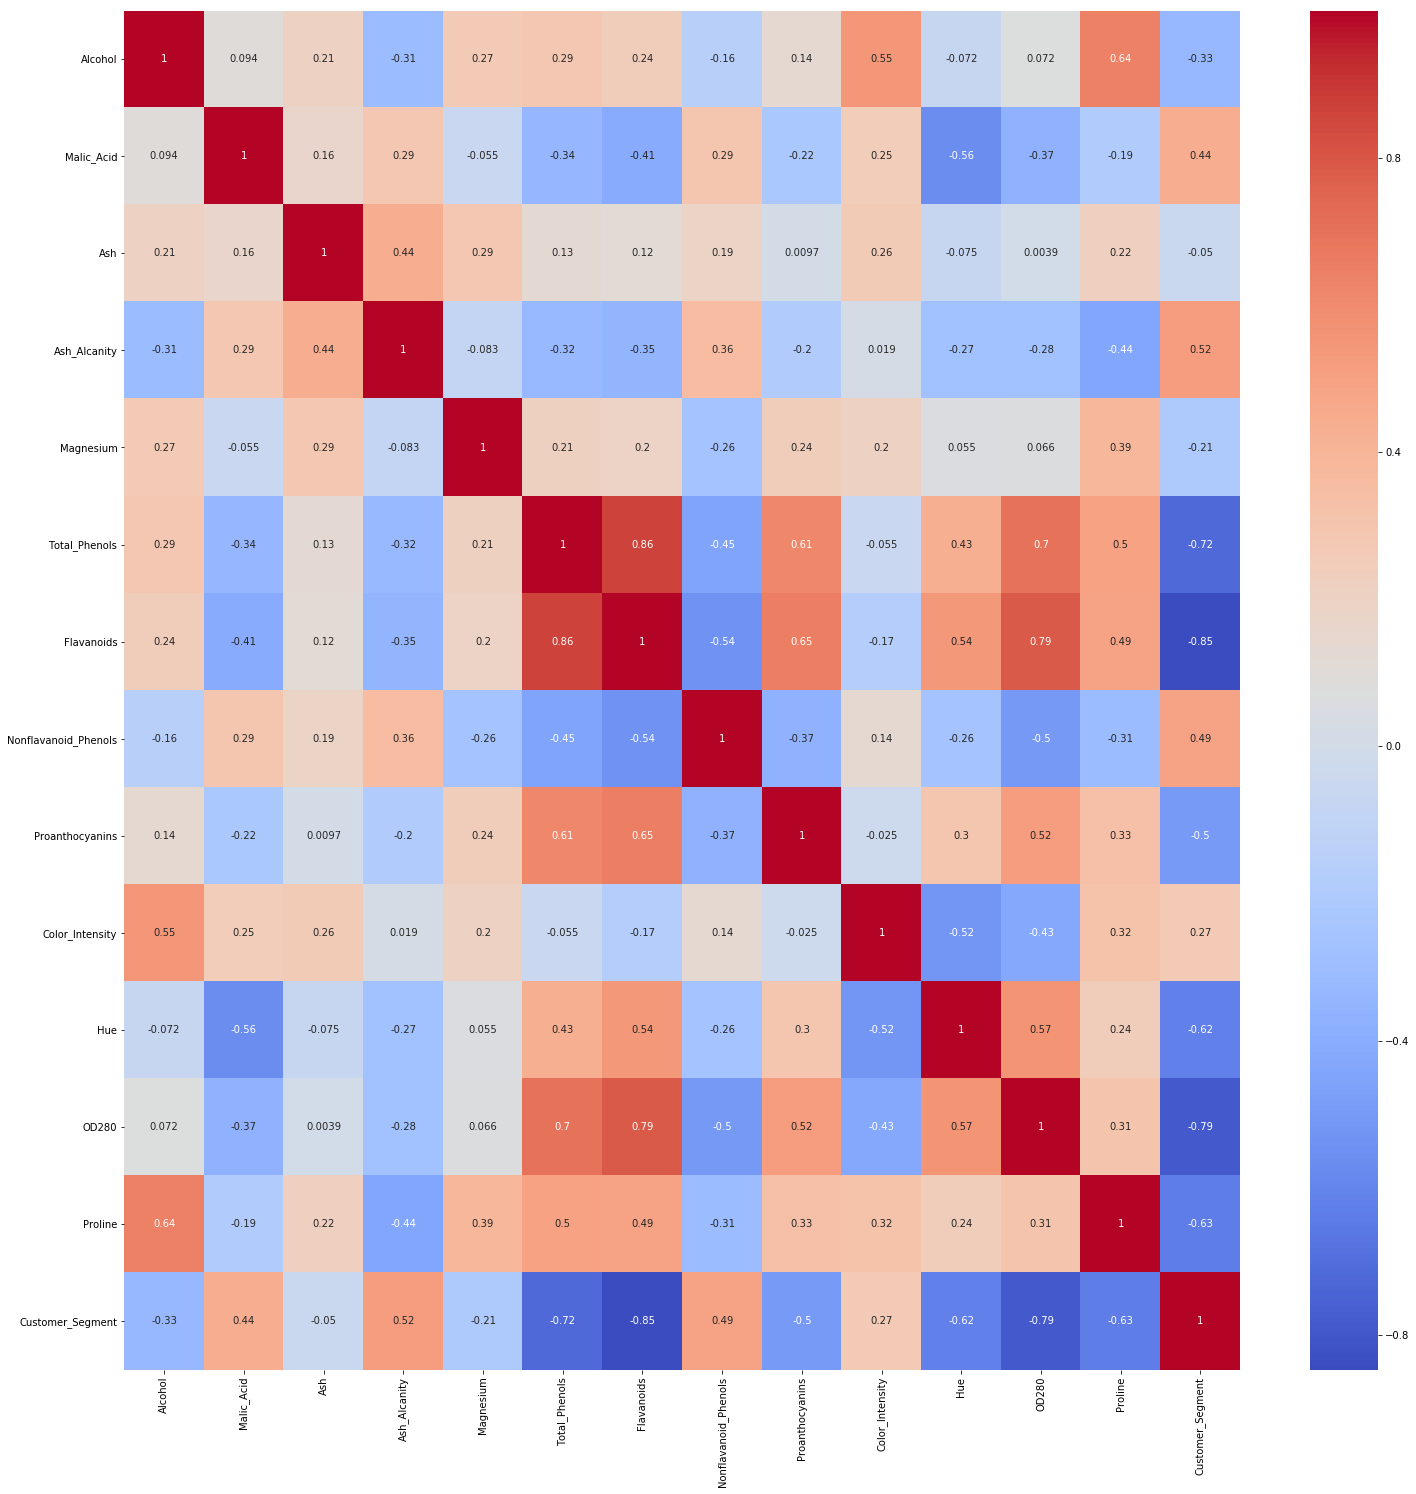

In [0]:
correlation = df.corr()
plt.figure(figsize = (25, 25))
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')
plt.show()

In [0]:
x = df.drop('Customer_Segment', axis = 1)  # axis为1代表列，为0代表行
y = df['Customer_Segment']

In [0]:
x.shape

(178, 13)

In [0]:
y.shape # 178行，1列

(178,)

In [0]:
#Scaling the features
x.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [0]:
######### scaling the features，得到一个缩小后的数据版本

sc = StandardScaler()
x =sc.fit_transform(x)

In [0]:
x

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ..., 
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [0]:
######### 按照三七分，给数据集分成train和test， test_size就是test所占比重 ########

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

In [0]:
x_train.shape

(124, 13)

In [0]:
x_test.shape

(54, 13)

In [0]:
# PCA
# PCA 降维, 凡是pca的方差值大于0.95的会被挑出来

pca = PCA(0.95)
pca.fit(x_train)
pca.explained_variance_ratio_

array([ 0.37964488,  0.20867993,  0.08782708,  0.06220269,  0.05985761,
        0.05080893,  0.03911755,  0.02817404,  0.02282736,  0.02113811])

In [0]:
pca_train = pca.transform(x_train)
pca_test = pca.transform(x_test)

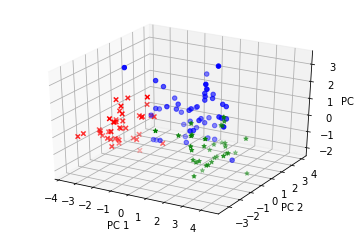

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(pca_train[y_train == 1, 0], pca_train[y_train == 1, 1], pca_train[y_train == 1, 2], c = 'red', marker = 'x')
ax.scatter(pca_train[y_train == 2, 0], pca_train[y_train == 2, 1], pca_train[y_train == 2, 2], c = 'blue', marker = 'o')
ax.scatter(pca_train[y_train == 3, 0], pca_train[y_train == 3, 1], pca_train[y_train == 3, 2], c = 'green', marker = '*')

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

plt.show()

In [0]:
###  贝叶斯算法进行比较

gnb = GaussianNB()
gnb.fit(pca_train, y_train)

GaussianNB(priors=None)

In [0]:
preds = gnb.predict(pca_test)
gnb.score(pca_test, y_test)

0.98148148148148151

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda_traintrain = lda.fit(x_train, y_train)
lda.explained_variance_ratio_

array([ 0.74038852,  0.25961148])

In [0]:
lda_train = lda.transform(x_train)
lda_test = lda.transform(x_test)

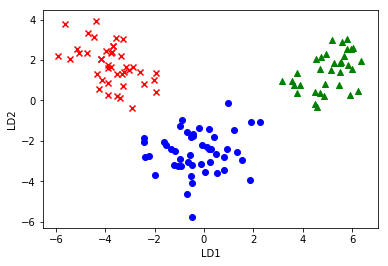

In [0]:
plt.scatter(lda_train[y_train==1,0],lda_train[y_train==1,1], c='red', marker='x')
plt.scatter(lda_train[y_train==2,0],lda_train[y_train==2,1], c='blue', marker='o')
plt.scatter(lda_train[y_train==3,0],lda_train[y_train==3,1], c='green', marker='^')

plt.xlabel('LD1')
plt.ylabel('LD2')

plt.show()